[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


# Mon premier réseau de neurones avec Keras - version commentée

Vous allez créer votre premier réseau de neurones vraiment très simple pour faire de la reconnaissance de formes (pattern matching). 

Notre petite application a pour objectif de convertir des températures en degrés Farenheit en degrés Celsius. Ce petit exercice nous montrera comment un réseau de neurones peut apprendre à approximer une fonction à partir de données.

Nous partirons d'un jeu de données très simple qui consiste en un tableau de conversion températures de degrés Farenheit en degré Celsius que nous allons générer à partir d'une formule. Ce petit exercice nous montrera comment un réseau de neurones peut apprendre à approximer une fonction à partir de données.

## Génération des données

Pour générer des données d'entraînement «synthétiques», nous nous servirons de la formule exacte: $\;\;celsius = \large{\frac{5}{9}}\small(farenheit -32)$

In [14]:
import numpy as np

farenheit_liste = [float(farenheit) for farenheit in range(-100,100,5)]
print("\nFarenheit: ",farenheit_liste)

celsius_liste = [round(5/9*(farenheit-32),2) for farenheit in farenheit_liste]
print("\nCelsius: ",celsius_liste)

farenheit_np = np.array(farenheit_liste)
celsius_np = np.array(celsius_liste)



Farenheit:  [-100.0, -95.0, -90.0, -85.0, -80.0, -75.0, -70.0, -65.0, -60.0, -55.0, -50.0, -45.0, -40.0, -35.0, -30.0, -25.0, -20.0, -15.0, -10.0, -5.0, 0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0, 55.0, 60.0, 65.0, 70.0, 75.0, 80.0, 85.0, 90.0, 95.0]

Celsius:  [-73.33, -70.56, -67.78, -65.0, -62.22, -59.44, -56.67, -53.89, -51.11, -48.33, -45.56, -42.78, -40.0, -37.22, -34.44, -31.67, -28.89, -26.11, -23.33, -20.56, -17.78, -15.0, -12.22, -9.44, -6.67, -3.89, -1.11, 1.67, 4.44, 7.22, 10.0, 12.78, 15.56, 18.33, 21.11, 23.89, 26.67, 29.44, 32.22, 35.0]


## Création d'un réseau de neurones ou modèle 

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

reseau_de_neurones = Sequential()
reseau_de_neurones.add(Dense(units=1, input_shape=[1]))

print("Architecture du réseau de neurones:\n")
print(reseau_de_neurones.summary())


Architecture du réseau de neurones:

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


## Compilation du modèle 

In [16]:
reseau_de_neurones.compile(optimizer=tf.keras.optimizers.Adam(0.1),
                           loss='mean_squared_error')


## Entraînement du modèle sur les données

In [17]:
traces_entrainement = reseau_de_neurones.fit(farenheit_np,celsius_np,
                                             epochs=500,
                                             verbose=0)
print("Le réseau de neurones a été entraîné!")


Le réseau de neurones a été entraîné!


## Évolution de la fonction de perte ou coût

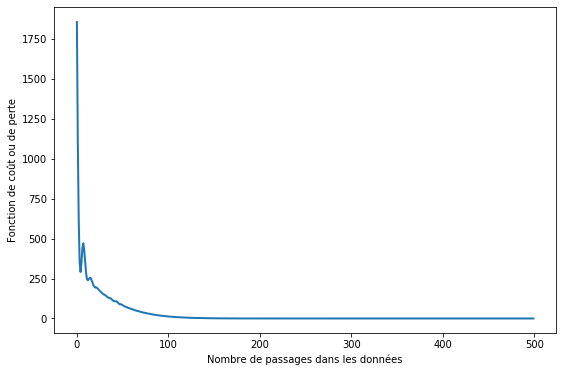

In [18]:
import matplotlib.pyplot as plt
nombre_dor = 1.618
hauteur = 6
longueur = int(nombre_dor * hauteur)
_ = plt.figure(figsize=(longueur,hauteur))
plt.xlabel('Nombre de passages dans les données')
plt.ylabel("Fonction de coût ou de perte")
_ = plt.plot(traces_entrainement.history['loss'],linewidth=2)
plt.show()


## Test sur des données «fraîches»

Prenons deux températures qui ne font pas partie de nos données d'entraînement. Nous choisirons des températures intéresantes dun point de vue physique comme le point de congélation de l'eau $-32^o F$ et le point d'ébullition de l'eau $212^o F$.

In [19]:
farenheit = 32
print("Farenheit:",farenheit,", prédiction =>","Celsius:",reseau_de_neurones.predict([farenheit])[0][0],", formule exacte:",5/9*(farenheit-32))


Farenheit: 32 , prédiction => Celsius: 0.0005245209 , formule exacte: 0.0


In [20]:
farenheit = 212
print("Farenheit:",farenheit,", prédiction =>","Celsius:",reseau_de_neurones.predict([farenheit])[0][0],", formule exacte:",5/9*(farenheit-32))


Farenheit: 212 , prédiction => Celsius: 100.00378 , formule exacte: 100.0


Le réseau de neurones retourne des valeurs très proches des vraies valeurs données par la formule $\;\;celsius = \large{\frac{5}{9}}\small(farenheit -32)$. Il est important de comprendre que le réseau de neurones n'apprend pas la formule exacte mais bien qu'il calcule itérativement une approximation de cette formule.  
    